# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


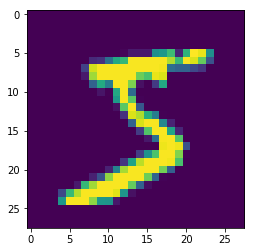

In [165]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [168]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [170]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers import LeakyReLU
model = Sequential()

# Attempt 1: accuracy -> 0.9957 {Too ,amy parameters}
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(64, (3, 3), activation='relu')) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(MaxPooling2D(pool_size=(2, 2))) #12
# model.add(Convolution2D(10, (1, 1), activation='relu')) #12
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(32, (3, 3), activation='relu')) #10
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(64, (3, 3), activation='relu')) #8
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(MaxPooling2D(pool_size=(2, 2))) #4
# model.add(Convolution2D(10, (4,4))) 
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Flatten())
# model.add(Activation('softmax'))


# Attempt 2: accuracy -> 0.9924
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(32, (3, 3), activation='relu')) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(MaxPooling2D(pool_size=(2, 2))) #12
# model.add(Convolution2D(32, (1, 1), activation='relu')) #12
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, (3, 3), activation='relu')) #10
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, (3, 3), activation='relu')) #8
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(MaxPooling2D(pool_size=(2, 2))) #4
# model.add(Convolution2D(10, (4,4))) 
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Flatten())
# model.add(Activation('softmax'))

# Attempt 3: accuracy -> 0.9906

# model.add(Convolution2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Convolution2D(32, (3, 3), activation=LeakyReLU(alpha=0.1))) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(MaxPooling2D(pool_size=(2, 2))) #12
# model.add(Convolution2D(32, (1, 1), activation=LeakyReLU(alpha=0.1))) #12
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Convolution2D(10, (3, 3), activation=LeakyReLU(alpha=0.1))) #10
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Convolution2D(10, (3, 3), activation=LeakyReLU(alpha=0.1))) #8
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(MaxPooling2D(pool_size=(2, 2))) #4
# model.add(Convolution2D(10, (4,4))) 
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Activation('softmax'))

# Attempt 4: accuracy -> 

model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, (3, 3), activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(10, (1, 1), activation='relu')) #12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, (3, 3), activation='relu')) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, (3, 3), activation='relu')) #8

# model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Convolution2D(10, (8,8))) 
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))


In [181]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_97 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_102 (Dropout)        (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_98 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_103 (Dropout)        (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 64)        0         
__________

In [182]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 17s 290us/step - loss: 0.4152 - acc: 0.8930 - val_loss: 0.0991 - val_acc: 0.9882
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 152us/step - loss: 0.2228 - acc: 0.9355 - val_loss: 0.0679 - val_acc: 0.9900
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 164us/step - loss: 0.1776 - acc: 0.9469 - val_loss: 0.0441 - val_acc: 0.9934
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 160us/step - loss: 0.1508 - acc: 0.9516 - val_loss: 0.0389 - val_acc: 0.9935
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [===

# New Section

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [184]:
print(score)

[0.016831885949522257, 0.9957]


In [0]:
y_pred = model.predict(X_test)

In [177]:
print(y_pred[:9])
print(y_test[:9])

[[3.6112270e-12 3.9454386e-12 3.3984897e-08 6.0617977e-10 1.3730051e-14
  2.2161365e-14 5.0112080e-19 1.0000000e+00 3.4872770e-14 7.6930862e-10]
 [9.0820151e-09 4.8521862e-08 1.0000000e+00 2.4531990e-10 9.9182641e-12
  2.7333932e-13 5.8203689e-08 6.4341389e-15 5.7530620e-09 3.3042607e-16]
 [4.8687481e-11 9.9999678e-01 1.0914199e-07 1.0352835e-13 2.3161761e-06
  8.0685094e-09 2.9437015e-09 7.1733655e-07 1.3919259e-09 3.4743863e-10]
 [9.9998701e-01 1.8770371e-11 4.0410995e-08 2.3544452e-10 1.2572433e-09
  1.8632392e-08 2.1972505e-06 1.5796991e-10 2.7475073e-09 1.0710734e-05]
 [2.2876508e-10 1.1895468e-09 1.0435930e-08 8.1030199e-10 9.9998915e-01
  2.5654751e-10 2.2882771e-08 1.1494570e-09 1.9051663e-07 1.0667922e-05]
 [1.2043802e-10 9.9999607e-01 5.4876754e-08 3.5033300e-14 1.9203080e-06
  4.7532716e-09 7.3810730e-10 1.9766901e-06 1.2738642e-09 2.0207849e-10]
 [1.0976914e-19 1.2544936e-10 5.2994636e-11 2.6549919e-11 9.9999917e-01
  1.2839106e-09 3.6956804e-18 7.1197270e-10 3.4089847e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [179]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored